<a href="https://colab.research.google.com/github/anjakg/dslr/blob/main/anju_and_aysha_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ML ayesha /bank data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/bank-additional-full.csv', delimiter=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


In [ ]:
data.replace('unknown', np.NaN, inplace=True)

In [ ]:
data.isnull().sum()/len(data)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [ ]:
# Number of distinct values in variables
# checking unique values
for i, column in enumerate(data.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(data[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [ ]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)   

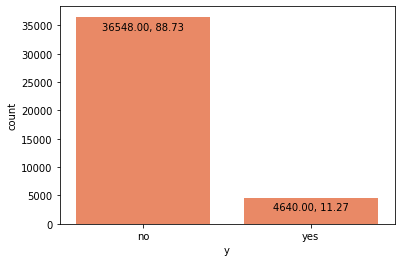

In [ ]:
ax = sns.countplot(x = data["y"],color="coral")  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()


Job


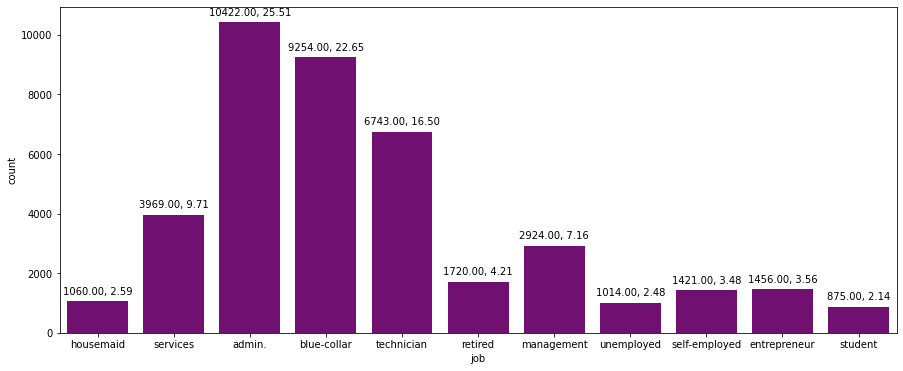

Marital


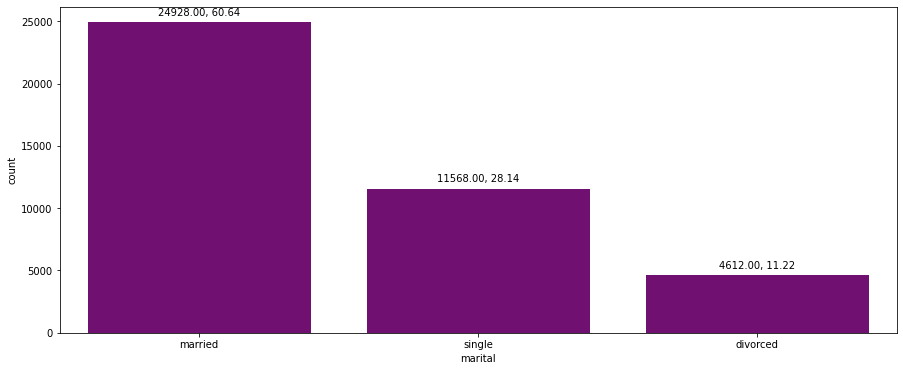

Education


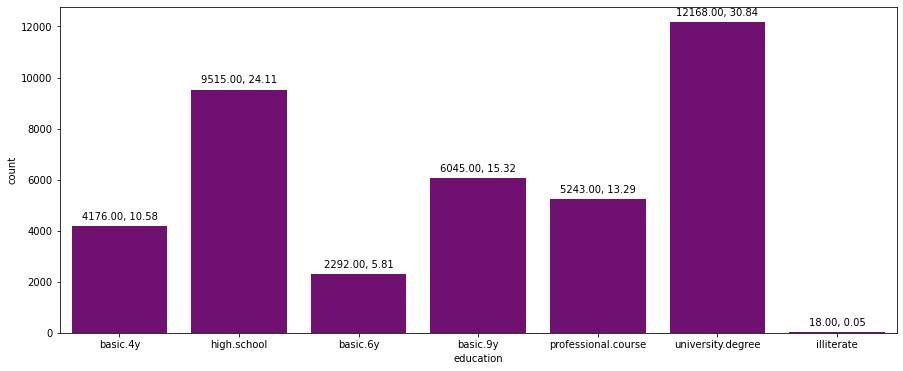

Default


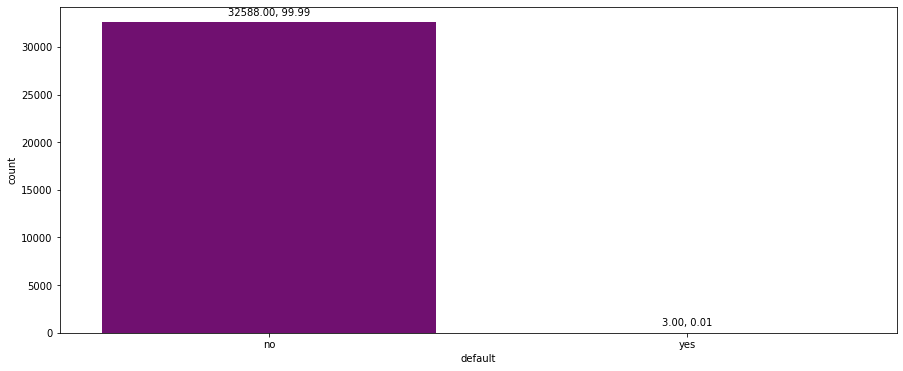

Housing


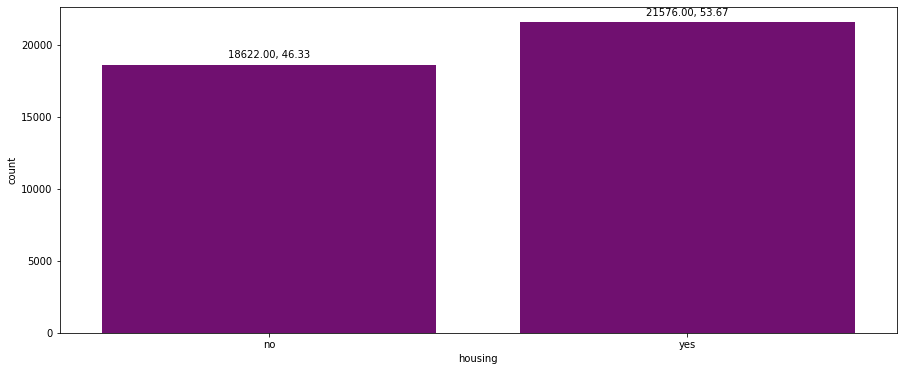

Loan


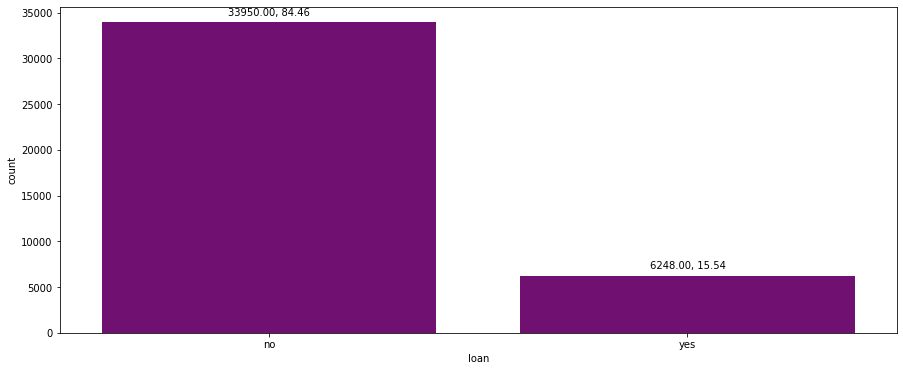

Contact


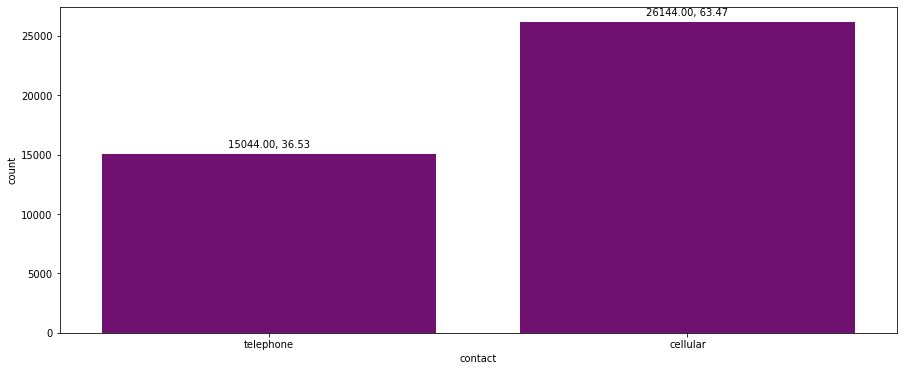

Month


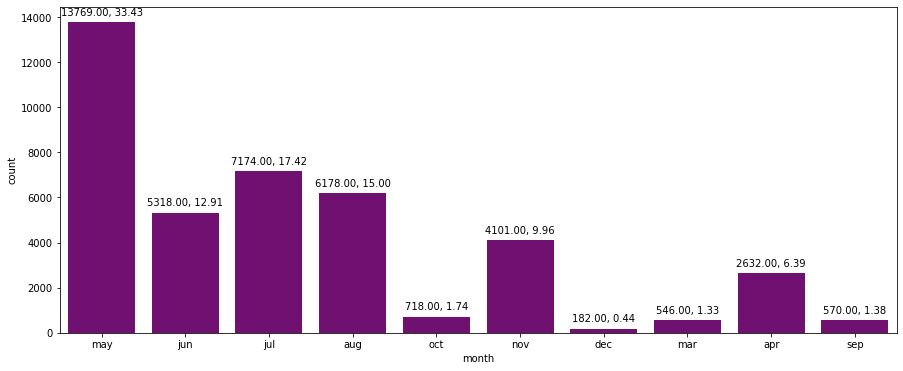

Day_Of_Week


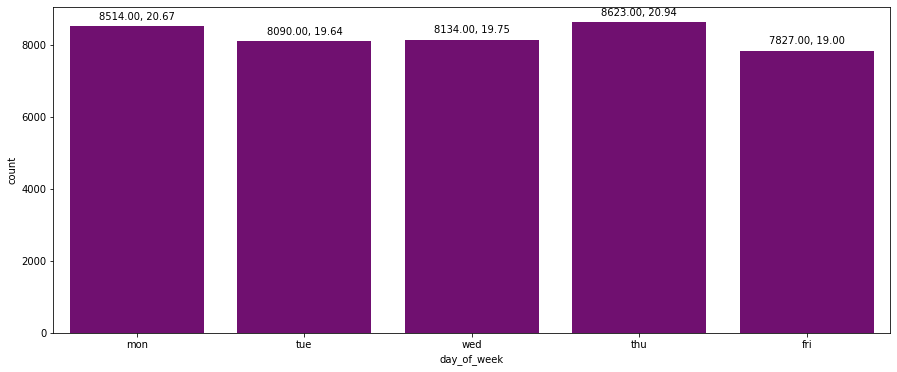

Poutcome


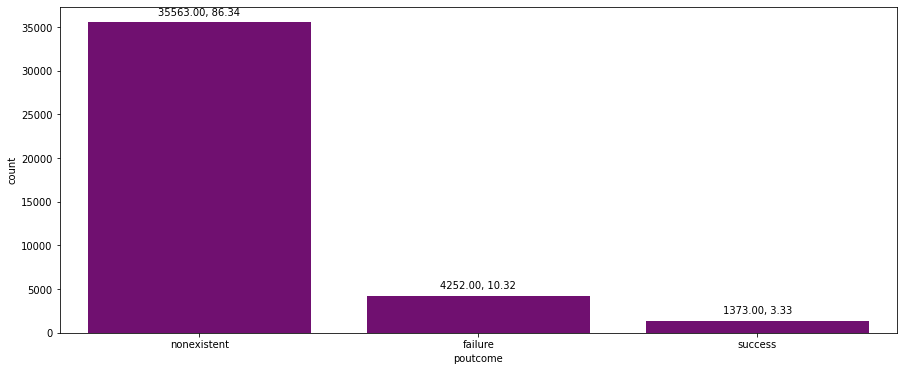

In [ ]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = data[column],color="purple")
    label_values(ax)
    plt.show()

Job


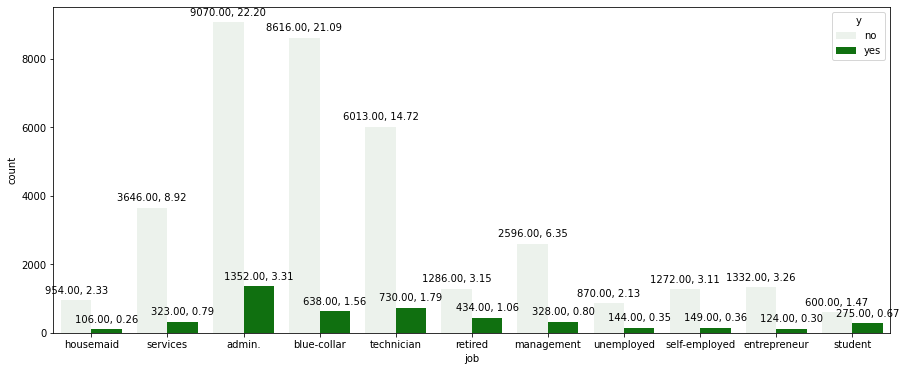

Marital


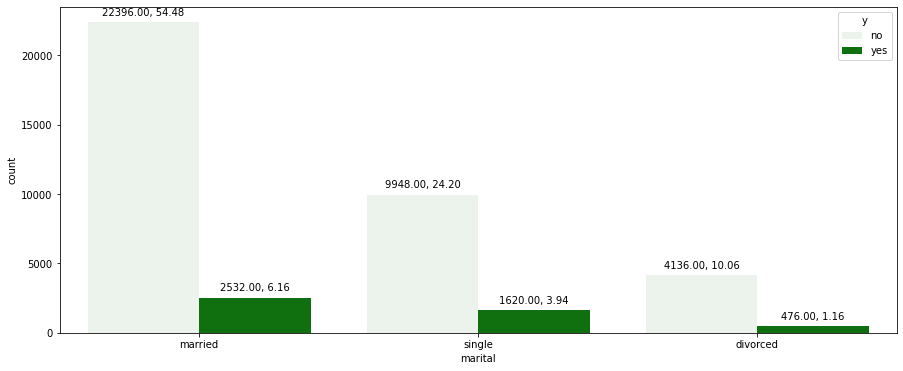

Education


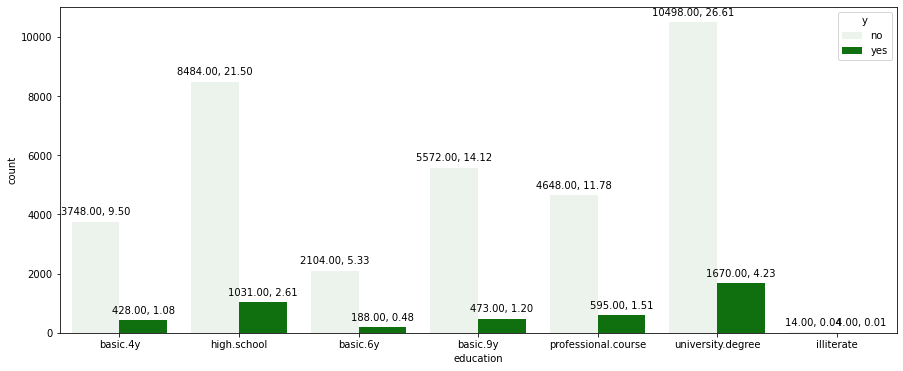

Default


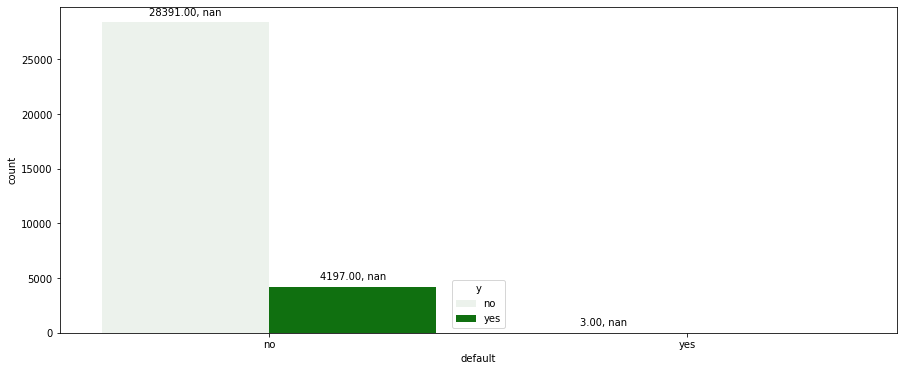

Housing


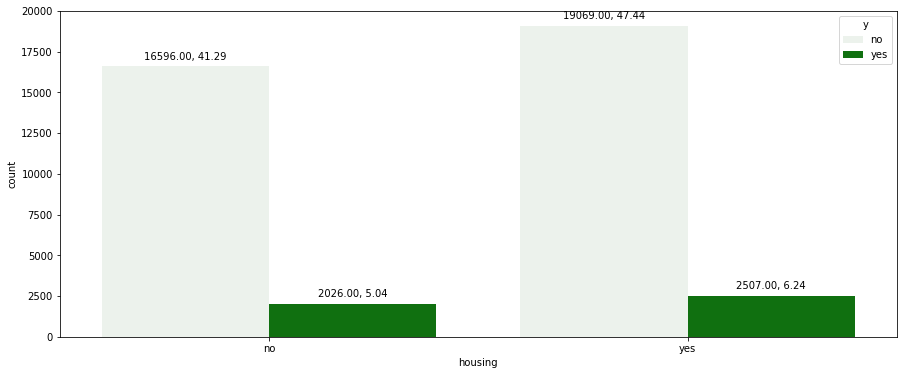

Loan


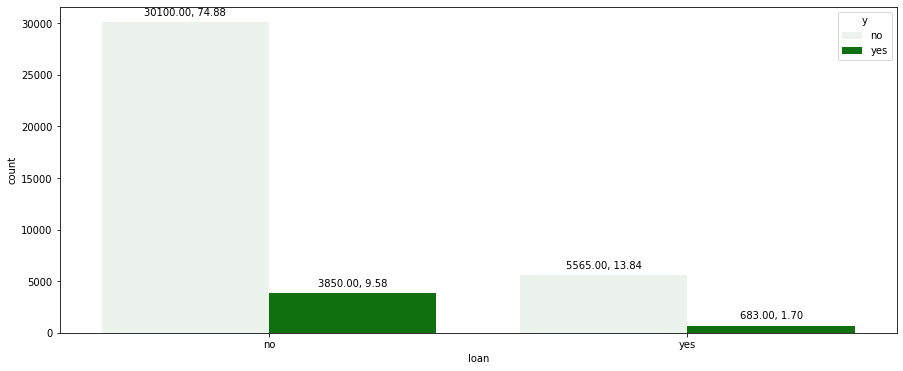

Contact


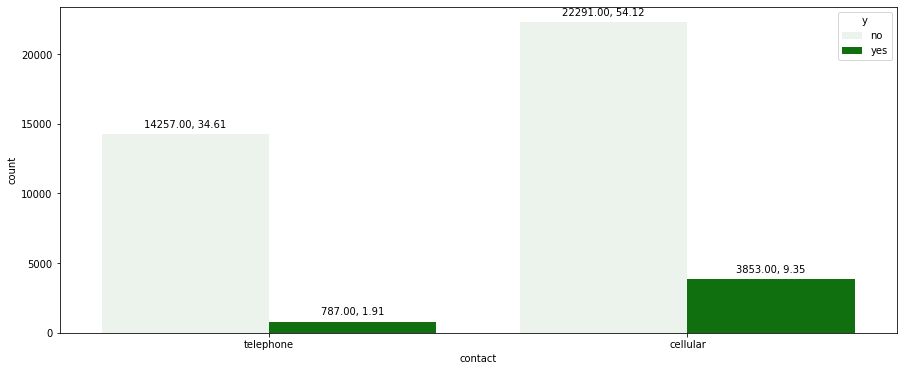

Month


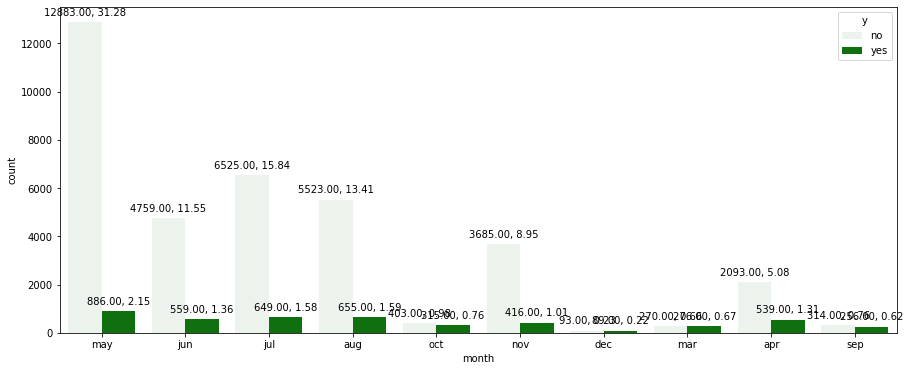

Day_Of_Week


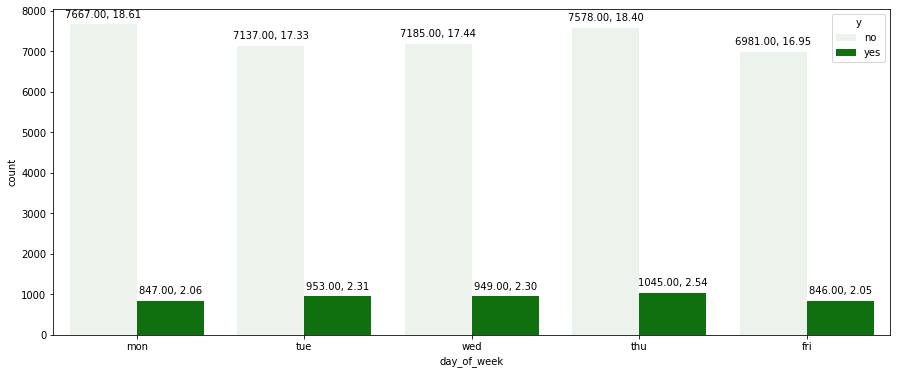

Poutcome


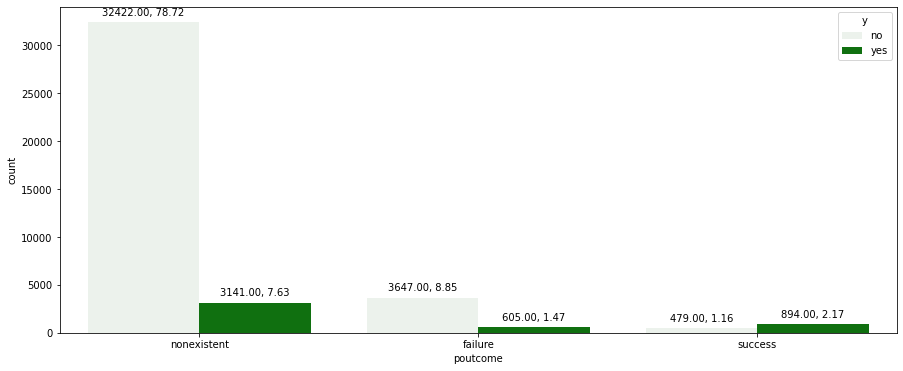

In [ ]:
#ploting the catagerocial values with the comparasion of output
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = data[column], hue=data["y"],color="Green")
    label_values(ax)
    plt.show()

Poutcome


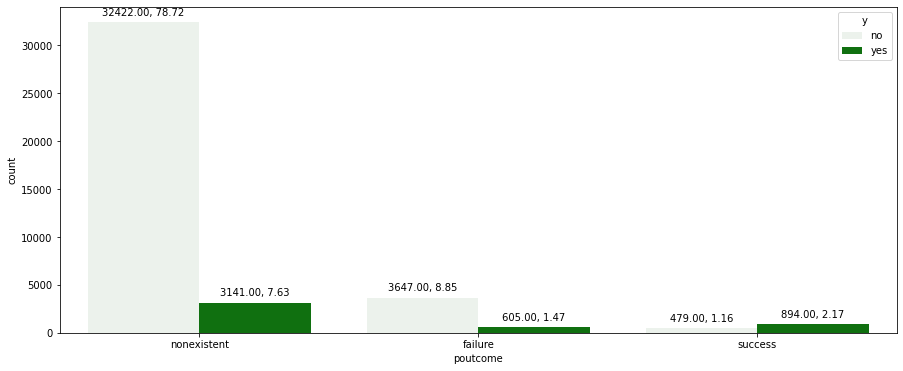

In [ ]:
plt.figure(figsize=(15, 6))
print(column.title())
ax = sns.countplot(x = data["poutcome"], hue=data["y"],color="Green")
label_values(ax)
plt.show()

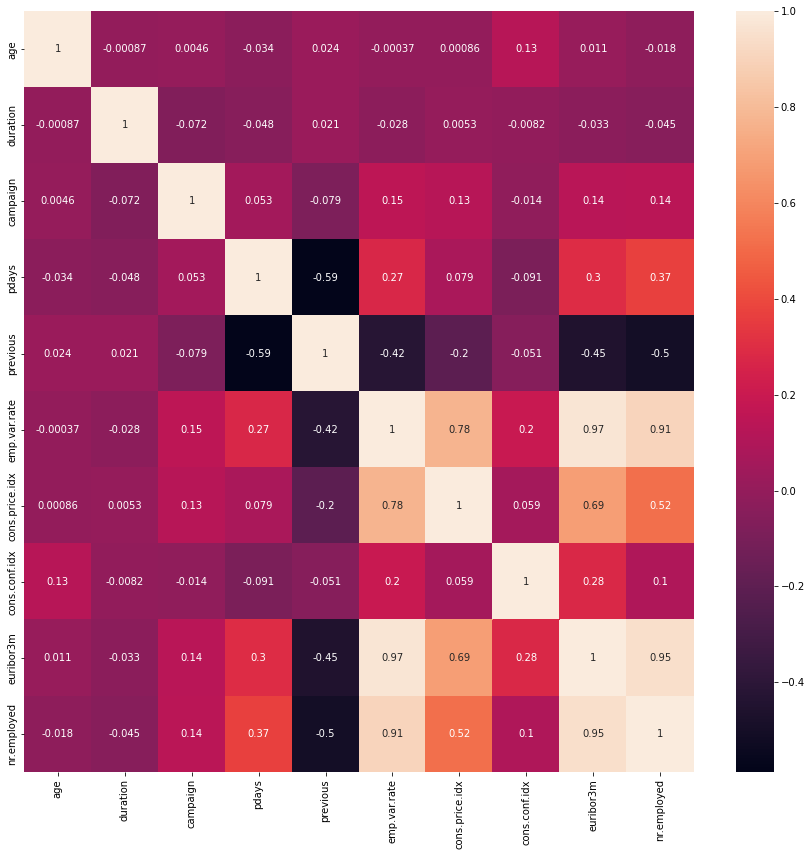

In [ ]:
plt.figure(figsize=(15, 14))
sns.heatmap(data.corr(), annot=True, color="red")
plt.show()

Euribor3M


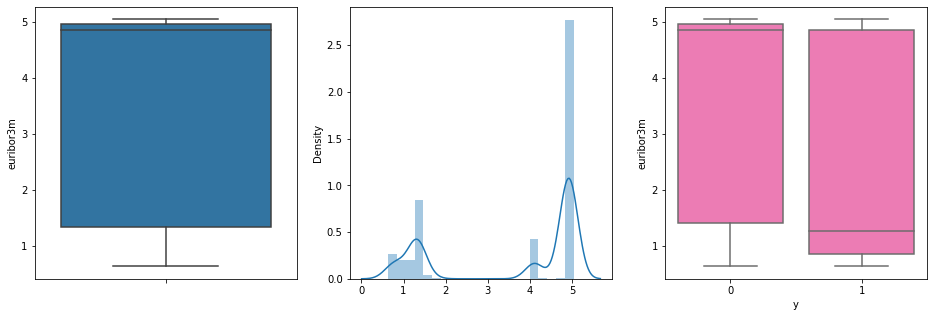

Age


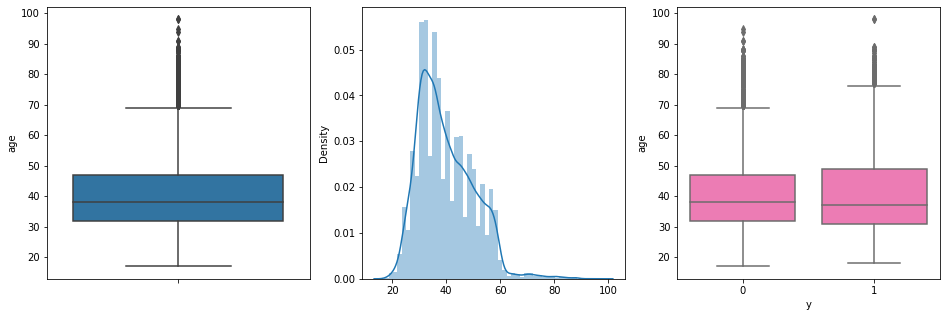

Cons.Price.Idx


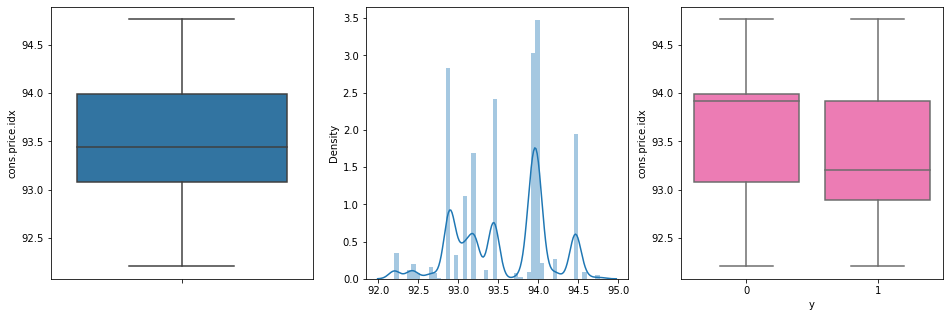

Cons.Conf.Idx


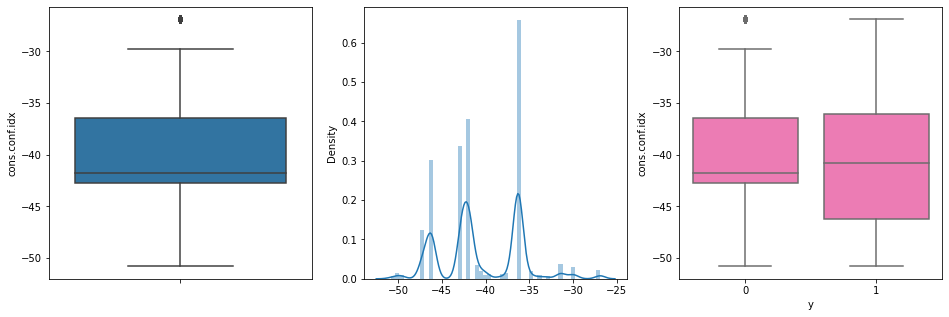

Campaign


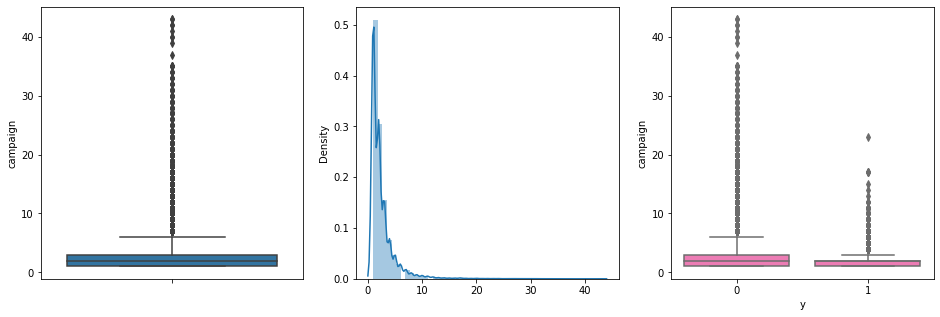

In [298]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = data[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = data[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = data["y"], y = data[column],color="hotpink")
    i += 1
    plt.show()

In [ ]:
# Droping the variables
data.drop(["default"], axis = 1, inplace=True)
var_categorical = list(set(var_categorical) - set(['default']))
data.dropna(inplace=True)

duration = data["duration"]
data.drop(["duration"], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['duration']))

data.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   campaign        38245 non-null  int64  
 10  pdays           38245 non-null  int64  
 11  previous        38245 non-null  int64  
 12  poutcome        38245 non-null  object 
 13  cons.price.idx  38245 non-null  float64
 14  cons.conf.idx   38245 non-null  float64
 15  euribor3m       38245 non-null  float64
 16  y               38245 non-null  object 
dtypes: float64(3), int64(4), object

In [ ]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [ ]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['marital', 'education', 'day_of_week', 'contact', 'loan', 'housing', 'poutcome', 'job', 'month']
7 ['pdays', 'euribor3m', 'previous', 'age', 'cons.price.idx', 'cons.conf.idx', 'campaign']


In [ ]:
varlist = ['loan', 'housing', 'y']

data[varlist] = data[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

In [ ]:
#one hot encoding 
contact = pd.get_dummies(data.contact, drop_first=True)
poutcome = pd.get_dummies(data.poutcome, drop_first=True)
job = pd.get_dummies(data.job, drop_first=True)
month = pd.get_dummies(data.month, drop_first=True)
marital = pd.get_dummies(data.marital, drop_first=True)
day_of_week = pd.get_dummies(data.day_of_week, drop_first=True)
education = pd.get_dummies(data.education, drop_first=True)

In [ ]:
# Concat the dummy columns to the dataframe
data = pd.concat([data, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,1,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,0,0,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,1,0,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,1,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,0,1,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0


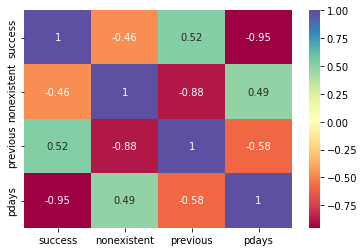

In [ ]:
 sns.heatmap(data[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
 plt.show()

In [ ]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
data.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
data.drop(['previous', 'pdays'], axis = 1, inplace = True)# dropping negative corelation
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))
data.head()

,age,housing,loan,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,1,93.994,-36.4,4.857,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,57,0,0,1,93.994,-36.4,4.857,0,1,1,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,1,93.994,-36.4,4.857,0,1,1,...,1,0,0,0,0,0,1,0,0,0
3,40,0,0,1,93.994,-36.4,4.857,0,1,1,...,1,0,0,0,1,0,0,0,0,0
4,56,0,1,1,93.994,-36.4,4.857,0,1,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
data.columns, len(data.columns)

(Index(['age', 'housing', 'loan', 'campaign', 'cons.price.idx', 'cons.conf.idx',
        'euribor3m', 'y', 'telephone', 'nonexistent', 'success', 'blue-collar',
        'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
        'services', 'student', 'technician', 'unemployed', 'aug', 'dec', 'jul',
        'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'married', 'single', 'mon',
        'thu', 'tue', 'wed', 'basic.6y', 'basic.9y', 'high.school',
        'illiterate', 'professional.course', 'university.degree'],
       dtype='object'), 42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(data, train_size = 0.8, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# MinMaxScaler Object
scaler = MinMaxScaler()

In [ ]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])


In [ ]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

In [ ]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [ ]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 41), (30596,), (7649, 41), (7649,))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import metrics

In [ ]:

    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
        # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F1 score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30596
Resampled dataset shape 54288


In [ ]:
s = StandardScaler()
(X_train.shape[1])

41

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score

In [ ]:
knn_model= KNeighborsClassifier(n_neighbors = 20)
knn_model.fit( scaler.fit_transform(X_train), y_train)

classifier(knn_model, scaler.fit_transform(x_smote),scaler.transform(X_test), y_smote,y_test)

Train accuracy is: 0.5677497789566756
Test accuracy is: 0.9006406066152438

Train ROC is: 0.5677497789566756
Test ROC is: 0.5515217412588401

F1 score is: 0.18803418803418803
Precision is: 0.676923076923077
Recall is: 0.10918114143920596


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state=0)
DT_model.fit(X_train, y_train)
classifier(DT_model, X_train,X_test,y_train,y_test)

Train accuracy is: 0.9944764021440711
Test accuracy is: 0.8486076611321741

Train ROC is: 0.9762799765996315
Test ROC is: 0.6264241337709399

F1 score is: 0.32438739789964993
Precision is: 0.30616740088105726
Recall is: 0.34491315136476425


In [ ]:
RF_model = RandomForestClassifier(random_state=0)
classifier(RF_model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9943783501111256
Test accuracy is: 0.8992025101320434

Train ROC is: 0.9783739117308862
Test ROC is: 0.630620884068014

F1 score is: 0.37772397094430993
Precision is: 0.5404157043879908
Recall is: 0.2903225806451613


In [ ]:
LG_model = LogisticRegression(solver='lbfgs', random_state = 100)
classifier(LG_model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.89985619035168
Test accuracy is: 0.9044319518891358

Train ROC is: 0.6074007379722208
Test ROC is: 0.6056322974447453

F1 score is: 0.33363719234275296
Precision is: 0.6288659793814433
Recall is: 0.22704714640198512


In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
classifier(svc_model.fit(X_train, y_train), X_train,X_test,y_train,y_test)

Train accuracy is: 0.9007713426591711
Test accuracy is: 0.9035167995816447

Train ROC is: 0.5941363669117694
Test ROC is: 0.5870605849958426

F1 score is: 0.28901734104046245
Precision is: 0.646551724137931
Recall is: 0.18610421836228289
